In [1]:
# block function
# step function
# bumps
# heavisine
# ramp
# gauss
# 

import numpy as np

def generate_signals(n=1024, signal_name = None, sigma=1, snr=3):
    x = np.linspace(1/n, 1, n)
    t = np.array([0.1, 0.13, 0.15, 0.23, 0.25, 0.4, 0.44, 0.65, 0.76, 0.78, 0.81])
    h1 = np.array([4, -5, 3, -4, 5, -4.2, 2.1, 4.3, -3.1, 2.1, -4.2])
    blocks = np.zeros(n)
    for i in range(len(h1)):
        blocks += h1[i] * (1 + np.sign(x - t[i])) / 2

    h2 = np.array([4, 5, 3, 4, 5, 4.2, 2.1, 4.3, 3.1, 5.1, 4.2])
    w = np.array([0.005, 0.005, 0.006, 0.01, 0.01, 0.03, 0.01, 0.01, 0.005, 0.008, 0.005])
    bumps = np.zeros(n)
    for i in range(len(h2)):
        bumps += h2[i] * np.maximum(0, (1 - np.abs((x - t[i]) / w[i]))) ** 4

    heavi = 4 * np.sin(4 * np.pi * x) - np.sign(x - 0.3) - np.sign(0.72 - x)
    eps = 0.05
    doppler = np.sqrt(x * (1 - x)) * np.sin((2 * np.pi * (1 - eps)) / (x + eps))

    signal = np.sqrt(snr*sigma**2)
    blocks = blocks / np.sqrt(np.var(blocks)) * signal
    bumps = bumps / np.sqrt(np.var(bumps)) * signal
    heavi = heavi / np.sqrt(np.var(heavi)) * signal
    doppler = doppler / np.sqrt(np.var(doppler)) * signal
    linear = piecewise_linear(n)
    linear = linear / np.sqrt(np.var(linear)) * signal
    gausss = gauss(n)
    gausss = gausss / np.sqrt(np.var(gausss)) * signal
    steps = step(n)
    steps = steps / np.sqrt(np.var(steps)) * signal

    if signal_name == 'blocks':
        return blocks
    if signal_name == 'bumps':
        return bumps
    if signal_name == 'heavi':
        return heavi
    if signal_name == 'doppler':
        return doppler
    if signal_name == 'linear':
        return linear
    if signal_name == 'gauss':
        return gausss
    if signal_name == 'step':
        return steps


def piecewise_linear(n=1024):
    x = np.linspace(-1, 1, n)
    y = np.piecewise(x, [x < 0.3, (x >= 0.3) & (x < 0.6), x >= 0.6],
                    [lambda x: 2 * x, lambda x: -5 * x + 1.2, lambda x: 3 * x - 1.2])
    return y

def gauss(n=1024):
    x = np.linspace(-1, 1, n)
    a, b, c = 1, 0, 0.2
    y = a * np.exp(-(x - b)**2 / (2 * c**2))
    return y

def step(n=1024):
    x = np.linspace(0, 1, n)
    y = np.piecewise(x, [x < 0.2, (x >= 0.2) & (x < 0.4), (x >= 0.4) & (x < 0.6),(x >= 0.6) & (x < 0.8),x>=0.8],
                    [0, 1, 0, 3,0])
    return y

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

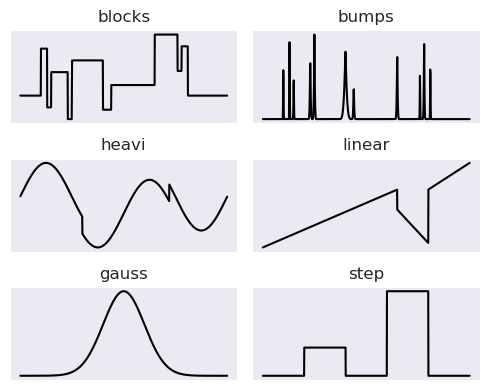

In [19]:
sns.set_style('dark')
fig, axes = plt.subplots(3, 2, figsize=(5, 4))

signal_names = ['blocks', 'bumps', 'heavi', 'linear', 'gauss', 'step']
n = 1024
snr = 3
sigma = 1

for i, signal_name in enumerate(signal_names):
    mu = generate_signals(n=n, signal_name=signal_name, snr=snr, sigma=sigma)
    row = i // 2
    col = i % 2
    sns.lineplot(data=mu, ax=axes[row, col], color='black', linewidth=1.5)
    axes[row, col].set_title(signal_name)
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

plt.tight_layout()
plt.savefig('signals.pdf', bbox_inches='tight')
plt.show()
